## Régression 

In [1]:
# import

import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)

import pickle


from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import make_scorer

In [2]:
taille_fenetre_to_run = 20
taille_stride_to_run = 5 
# 20w_5s déterminer dans search window  

In [35]:
data = pickle.load(open(f"Data/donnees_{taille_fenetre_to_run}w_{taille_stride_to_run}s.pkl", "rb"))

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),  # Alpha peut être ajusté
    "Lasso Regression": Lasso(alpha=0.1, random_state=42),  # Alpha peut être ajusté
    "Elastic Net Regression": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # Alpha et l1_ratio ajustables
}

In [37]:
X_np_binary = data["X_np_binary"] # label pourrait introduire un biais
y_np = data["y_np"]
idx_explicabilite = data["idx_explicabilite"]
X_binary_explicabilite = data["X_binary_explicabilite"]
y_explicabilite = data["y_explicabilite"]
X_np_binary.shape

(19010, 158)

In [6]:
features_binary = data["features_names_binary"]

In [7]:
n_splits = 5
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True) 

results = {model_name: {'MSE': [], 'MAE': [], 'RMSE': [], 'MAPE': []} for model_name in models.keys()}


In [8]:
for model_name, model in models.items():
    print(f"Training and evaluating model: {model_name}")
    fold = 0
    for train_index, test_index in kf.split(X_np_binary):
        print(f"Fold: {fold}/{n_splits}")

        X_train, X_test = X_np_binary[train_index], X_np_binary[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        results[model_name]['MSE'].append(mean_squared_error(y_test, y_pred))
        results[model_name]['MAE'].append(mean_absolute_error(y_test, y_pred))
        results[model_name]['RMSE'].append(root_mean_squared_error(y_test, y_pred))
        results[model_name]['MAPE'].append(mean_absolute_percentage_error(y_test, y_pred))

        filename = f"Models/{model_name}_{taille_fenetre_to_run}w_{taille_stride_to_run}s_{fold}fold.pkl"
        pickle.dump(model, open(filename, "wb"))

        fold += 1

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_values in metrics.items():
        print(f"{metric_name}: {np.mean(metric_values)}")

Training and evaluating model: Linear Regression
Fold: 0/5
Fold: 1/5
Fold: 2/5
Fold: 3/5
Fold: 4/5
Training and evaluating model: Ridge Regression
Fold: 0/5
Fold: 1/5
Fold: 2/5
Fold: 3/5
Fold: 4/5
Training and evaluating model: Lasso Regression
Fold: 0/5
Fold: 1/5
Fold: 2/5
Fold: 3/5
Fold: 4/5
Training and evaluating model: Elastic Net Regression
Fold: 0/5
Fold: 1/5
Fold: 2/5
Fold: 3/5
Fold: 4/5
Model: Linear Regression
MSE: 0.6231591540905607
MAE: 0.41158995946412313
RMSE: 0.7786337359501052
MAPE: 0.0043201862422908325
Model: Ridge Regression
MSE: 0.3140089808056367
MAE: 0.4046338499788555
RMSE: 0.560218207574105
MAPE: 0.004220195648303212
Model: Lasso Regression
MSE: 0.9035527328848675
MAE: 0.7017115933354992
RMSE: 0.9504060632816731
MAPE: 0.007493167888930258
Model: Elastic Net Regression
MSE: 1.0523869081018742
MAE: 0.7250202540940883
RMSE: 1.0255871523943285
MAPE: 0.00779402254860566


In [9]:
# # output 

# Résultats pour 50w_10s : 

# Model: Linear Regression
# MSE: 3.28749919605441
# MAE: 0.43617819174236877
# RMSE: 1.535918252689962
# MAPE: 0.00464676614408746

# Model: Ridge Regression
# MSE: 0.29579455479043126
# MAE: 0.390148446122558
# RMSE: 0.5426490449689598
# MAPE: 0.00409710874170479

# Model: Lasso Regression
# MSE: 0.8949032010207849
# MAE: 0.692852932556869
# RMSE: 0.9454673628811353
# MAPE: 0.007422811587634639

# Model: Elastic Net Regression
# MSE: 0.988576549953345
# MAE: 0.6962051255211246
# RMSE: 0.9937467970856739
# MAPE: 0.0074642256087040365

In [10]:
# # output 

# Résultats pour 20w_5s : 

# Model: Linear Regression
# MSE: 0.6231591540905607       # amélioration de 5 fois
# MAE: 0.41158995946412313      
# RMSE: 0.7786337359501052      # amélioration de 2 fois
# MAPE: 0.0043201862422908325

# Model: Ridge Regression
# MSE: 0.3140089808056367       
# MAE: 0.4046338499788555
# RMSE: 0.560218207574105    
# MAPE: 0.004220195648303212

# Model: Lasso Regression
# MSE: 0.9035527328848675
# MAE: 0.7017115933354992
# RMSE: 0.9504060632816731
# MAPE: 0.007493167888930258

# Model: Elastic Net Regression
# MSE: 1.0523869081018742       # détérioration de 0.06
# MAE: 0.7250202540940883       # détérioration de 0.03
# RMSE: 1.0255871523943285      # détérioration de 0.025
# MAPE: 0.00779402254860566     

In [21]:
# Configurations
n_splits = 5
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

# Scorer personnalisé pour évaluer les modèles
scoring = {
    "MSE": make_scorer(mean_squared_error, greater_is_better=False),
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "RMSE": make_scorer(root_mean_squared_error, greater_is_better=False),
    "MAPE": make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

# Modèles et grilles d'hyperparamètres
param_grids = {
    "Linear Regression": {
        "fit_intercept": [True, False]
    },
    "Ridge Regression": {
        "alpha": [0.1, 1.0, 10.0, 100.0],
        "fit_intercept": [True, False],
        "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
        
    },
    "Lasso Regression": {
        "alpha": [0.01, 0.1, 1.0, 10.0],
        "fit_intercept": [True, False],
        "selection": ["cyclic", "random"],
        "max_iter": [1000, 5000, 10000],
        "tol": [1e-3, 1e-4, 1e-5]
    },
    "Elastic Net Regression": {
        "alpha": [0.01, 0.1, 1.0, 10.0],
        "l1_ratio": [0.1, 0.5, 0.9],
        "fit_intercept": [True, False],
        "selection": ["cyclic", "random"],
        "max_iter": [1000, 5000, 10000],
        "tol": [1e-3, 1e-4, 1e-5]
    }
}

# Résultats des GridSearch
results = {}

# Effectuer le GridSearch pour chaque modèle
for model_name, param_grid in param_grids.items():
    print(f"Performing GridSearch for {model_name}...")
    
    if model_name == "Linear Regression":
        model = LinearRegression()
    elif model_name == "Ridge Regression":
        model = Ridge(random_state=42)
    elif model_name == "Lasso Regression":
        model = Lasso(random_state=42)
    elif model_name == "Elastic Net Regression":
        model = ElasticNet(random_state=42)
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",  # Utilisation de MSE comme critère principal
        cv=kf,
        verbose=2,
        n_jobs=-1
    )
    
    # Entraîner avec GridSearch
    grid_search.fit(X_np_binary, y_np)
    
    # Stocker les résultats
    results[model_name] = {
        "Best Params": grid_search.best_params_,
        "Best Score (MSE)": -grid_search.best_score_,  # Revenir à une valeur positive pour MSE
        "Best Estimator": grid_search.best_estimator_
    }

# Afficher les meilleurs hyperparamètres pour chaque modèle
for model_name, res in results.items():
    print(f"\n{model_name}:")
    print(f"  Best Params: {res['Best Params']}")
    print(f"  Best Score (MSE): {res['Best Score (MSE)']:.6f}")
    print(f"  Best Estimator: {res['Best Estimator']}")
    print("\n")


Performing GridSearch for Linear Regression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.3s
[CV] END ................................fit_intercept=False; total time=   0.3s
[CV] END .................................fit_intercept=True; total time=   0.3s
[CV] END .................................fit_intercept=True; total time=   0.3s
[CV] END .................................fit_intercept=True; total time=   0.3s
[CV] END .................................fit_intercept=True; total time=   0.3s
[CV] END ................................fit_intercept=False; total time=   0.3s
[CV] END ................................fit_intercept=False; total time=   0.2s
[CV] END ................................fit_intercept=False; total time=   0.1s
[CV] END ................................fit_intercept=False; total time=   0.1s
Performing GridSearch for Ridge Regression...
Fitting 5 folds for each of 56 candid

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........alpha=0.1, fit_intercept=False, solver=sag; total time=   9.4s
[CV] END ..........alpha=0.1, fit_intercept=True, solver=sag; total time=   8.8s
[CV] END .........alpha=1.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END .........alpha=1.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END .........alpha=1.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END .........alpha=1.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END .........alpha=1.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.0, fit_intercept=True, solver=svd; total time=   0.1s
[CV] END ..........alpha=0.1, fit_intercept=True, solver=sag; total time=  10.4s
[CV] END ..........alpha=1.0, fit_intercept=True, solver=svd; total time=   0.2s
[CV] END ..........alpha=1.0, fit_intercept=True, solver=svd; total time=   0.2s
[CV] END ..........alpha=1.0, fit_intercept=True, solver=svd; total time=   0.1s
[CV] END .....alpha=1.0, fit

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........alpha=0.1, fit_intercept=True, solver=saga; total time=  18.6s
[CV] END .........alpha=1.0, fit_intercept=False, solver=sag; total time=   2.7s
[CV] END .........alpha=1.0, fit_intercept=False, solver=sag; total time=   2.4s
[CV] END .........alpha=1.0, fit_intercept=False, solver=sag; total time=   2.6s
[CV] END ........alpha=0.1, fit_intercept=False, solver=saga; total time=  13.5s
[CV] END ........alpha=10.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END ........alpha=10.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END ........alpha=10.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END ........alpha=10.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END ........alpha=10.0, fit_intercept=True, solver=auto; total time=   0.0s
[CV] END .........alpha=10.0, fit_intercept=True, solver=svd; total time=   0.2s
[CV] END .........alpha=10.0, fit_intercept=True, solver=svd; total time=   0.2s
[CV] END .........alpha=10.0

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ........alpha=100.0, fit_intercept=True, solver=sag; total time=   0.3s
[CV] END ........alpha=100.0, fit_intercept=True, solver=sag; total time=   0.3s
[CV] END ........alpha=100.0, fit_intercept=True, solver=sag; total time=   0.3s
[CV] END ........alpha=100.0, fit_intercept=True, solver=sag; total time=   0.3s
[CV] END .......alpha=100.0, fit_intercept=True, solver=saga; total time=   0.3s
[CV] END .......alpha=100.0, fit_intercept=True, solver=saga; total time=   0.3s
[CV] END ......alpha=100.0, fit_intercept=False, solver=auto; total time=   0.0s
[CV] END ......alpha=100.0, fit_intercept=False, solver=auto; total time=   0.0s
[CV] END ......alpha=100.0, fit_intercept=False, solver=auto; total time=   0.0s
[CV] END ......alpha=100.0, fit_intercept=False, solver=auto; total time=   0.0s
[CV] END .......alpha=100.0, fit_intercept=True, solver=saga; total time=   0.3s
[CV] END .......alpha=100.0, fit_intercept=True, solver=saga; total time=   0.3s
[CV] END ......alpha=100.0, 

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+02, tolerance: 3.560e+01
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e+02, tolerance: 3.567e+01
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while

[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   1.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+02, tolerance: 3.536e+01
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+02, tolerance: 3.482e+01
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selec

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+02, tolerance: 3.482e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.559e+01, tolerance: 3.567e+01
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+02, tolerance: 3.536e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.561e+01, tolerance: 3.560e+01
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.390e+01, tolerance: 3.536e+01
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.561e+01, tolerance: 3.560e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.390e+01, tolerance: 3.536e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.115e+01, tolerance: 3.482e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.8s
[CV] END alpha=0.01, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.8s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.8s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.8s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.1s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.1s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.0001; total time=   4.5s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.0001; total time=   5.0s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, select

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.051e+00, tolerance: 3.536e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=cyclic, tol=1e-05; total time=   7.2s
[CV] END alpha=0.01, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=random, tol=1e-05; total time=   4.8s
[CV] END alpha=0.01, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   2.0s
[CV] END alpha=0.01, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   1.8s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=random, tol=1e-05; total time=   7.7s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=random, tol=1e-05; total time=   7.7s
[CV] END alpha=0.01, fit_intercept=True, max_iter=5000, selection=random, tol=1e-05; total time=   8.0s
[CV] END alpha=0.01, fit_intercept=True, max_iter=10000, sel

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.329e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.296e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.287e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.0s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.329e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.296e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.293e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.287e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.747e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.575e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   2.0s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   2.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   2.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.771e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   2.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.736e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   2.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.760e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.575e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   2.2s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   2.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.736e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.771e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   2.0s
[CV] END alpha=0.01, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   2.2s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.7s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   3.0s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   3.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.9s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.9s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.9s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.412e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.062e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.221e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.7s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.8s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   6.2s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   6.3s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.0s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   7.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.772e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.031e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   7.1s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   6.4s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   6.4s
[CV] END alpha=0.01, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   1.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.2s
[CV] END alpha=0.01, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   2.7s
[CV] END alpha=0.01, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   3.0s
[CV] END alpha=0.01, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.6s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.5s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.7s
[CV] END alpha=0.01, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.7s
[CV] END alpha=0.01, fit_intercept=False, max_iter=

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+01, tolerance: 3.536e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.4s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.1s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.1s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  12.6s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.0001; total time=   1.3s
[CV] END alpha=0.1, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.2s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.4s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+01, tolerance: 3.567e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.268e+00, tolerance: 3.560e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.7s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.7s
[CV] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=1e-05; total time=   1.6s
[CV] END alpha=0.1, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.3s
[CV] END alpha=0.1, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.4s
[CV] END alpha=0.1, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.4s
[CV] END alpha=0.1, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.4s
[CV] END alpha=0.1, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.4s
[CV] END alpha=0.1, fit_intercept=True, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.6s
[CV] END alpha=0.1, fit_intercept=True, max_iter=5000, selection=cyclic

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.725e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.741e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.1s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.0s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.3s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.683e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.9s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.0s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.741e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.9s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   0.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.683e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.7s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   2.0s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.793e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.410e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.7s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.462e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.495e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   2.0s
[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   2.1s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.522e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   2.1s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.0s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   7.7s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.3s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.4s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.4s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.255e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.856e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   0.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.334e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.923e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   6.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.343e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   6.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.9s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   9.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=  10.1s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   9.8s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=  10.1s
[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   9.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.960e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.870e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=  10.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=  10.7s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=   7.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=   8.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=   9.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=  12.3s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=0.0001; total time=   1.1s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=  15.9s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=  16.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.181e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  16.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.349e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  16.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.309e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  16.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.269e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  16.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.974e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  15.4s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=0.0001; total time=  11.6s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=0.0001; total time=  13.3s
[CV] END alpha=1.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=1.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=1.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=1.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=1.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=1.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001; total time=   0.0s
[CV] END alpha=1.0, fit_intercept=True, max_iter=1000, selection

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.215e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.5s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.207e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.215e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.6s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.6s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.6s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.207e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   1.2s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   1.6s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   1.7s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.585e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  18.2s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.498e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.749e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.577e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.5s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  20.1s
[CV] END alpha=1.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.089e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  20.9s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  20.7s
[CV] END alpha=0.1, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  21.6s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.2s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.5s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.8s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.966e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   9.1s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.336e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.205e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   1.6s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   3.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.067e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.7s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   4.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   8.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.445e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   8.9s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   5.2s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   5.2s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.182e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   7.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.392e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.121e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.732e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=5000, selection=random, tol=1e-05; total time=   8.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=  12.1s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=  12.1s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=  16.8s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=0.0001; total time=  17.6s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.041e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  17.1s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=0.0001; total time=   4.9s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  17.3s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  16.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.050e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.354e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=0.0001; total time=   5.5s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=0.0001; total time=   5.4s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1000, se

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.008e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=10000, selection=cyclic, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=True, max_iter=1

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.882e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=cyclic, tol=1e-05; total time=  17.9s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=0.0001; total time=   0.9s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.4s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.4s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.4s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.5s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.2s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.3s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.2s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.3s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  16.5s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  16.5s
[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  16.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.706e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.896e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.7s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.0s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, max_iter=10000, selection=random, tol=1e-05; total time=  16.5s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.1s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.2s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.501e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.0s
[CV] END alpha=10.0, fit_intercept=False, max_iter=1000, selection=random, tol=1e-05; total time=   1.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.001; total time=   0.8s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   1.8s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=random, tol=0.0001; total time=   2.0s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   4.1s
[CV] END alpha=10.0, fit_intercept=False, max_iter=5000, selection=cyclic, tol=1e-05; total time=   5.1s
[CV] END alpha=10.0, fit_intercept=False, max_iter=50

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Performing GridSearch for Elastic Net Regression...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.8s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.8s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.8s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.2s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.3s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.1, m

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.470e+00, tolerance: 3.567e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.080e+00, tolerance: 3.560e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.6s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.6s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.6s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.340e+00, tolerance: 3.482e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.358e+00, tolerance: 3.536e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.8s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   0.8s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.7s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.5

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.057e+01, tolerance: 3.567e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.971e+01, tolerance: 3.560e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.7s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.8s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   0.5s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, 

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+01, tolerance: 3.482e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.7s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.2s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.897e+01, tolerance: 3.536e+00
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.1s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.1s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.1s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.4s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.4s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.1s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   1.1s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.9, m

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+05, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+05, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+05, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+05, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+05, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+05, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+05, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+05, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+05, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=1e-05; total time=   3.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.361e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.400e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.001; total time=  14.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  14.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.424e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.399e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.362e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  14.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  14.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.400e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  14.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.424e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.362e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=1e-05; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=1e-05; total time=   1.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.399e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  14.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=1e-05; total time=   1.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  19.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  20.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  21.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  20.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  21.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.167e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.0001; total time=  27.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.197e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.0001; total time=  27.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.258e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.0001; total time=  28.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=random, tol=0.001; total time=   0.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=random, tol=0.0001; total time=   1.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=random, tol=0.0001; total time=   1.1s
[CV] END alpha=0.01, fit_intercept=Fa

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.158e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.0001; total time=  28.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.0001; total time=  28.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.167e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  28.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.197e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  29.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.258e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  29.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.809e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.777e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.812e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.801e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.772e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.809e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.777e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   1.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.812e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.801e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  28.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.158e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  28.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   1.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   2.0s
[CV] END alpha=0.01, fit_intercept=False, 

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.663e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.669e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=  12.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.0001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.0001; total time=   1.7s
[CV] END alpha=0.01, fit_intercept=False, l1_

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.641e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.655e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.669e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.663e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.662e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  12.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.0001; total time=   1.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.641e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.655e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  12.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.2s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=1e-05; total time=   2.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=1e-05; total time=   2.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=1e-05; total time=   2.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=1e-05; total time=   2.2s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=1e-05; total time=   2.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.001; total time=  15.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ra

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  24.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.306e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  25.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  25.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.001; total time=   0.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.001; total time=   1.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.001; total time=   1.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.0001; total time=   1.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.0001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=Fa

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.299e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.327e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  25.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  25.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  25.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  25.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=1e-05; total time=   2.2s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  25.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.306e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=1e-05; total time=   2.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=1e-05; total time=   2.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=1e-05; total time=   2.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=1e-05; total time=   2.2s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.2s
[CV] END alpha=0.01, fit_intercept=False, l1

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.322e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.323e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.331e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.305e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.307e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.322e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.323e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.331e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.305e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.307e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   1.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.299e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  25.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   2.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  25.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   2.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   2.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.327e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   2.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.575e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   2.2s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   2.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.842e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   2.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.803e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.762e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   2.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   2.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   2.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.7s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.8s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, l1_rat

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.758e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.845e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  10.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   1.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   1.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.694e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  10.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   3.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   3.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   2.9s
[CV] END alpha=0.01, fit_intercept=False, l1

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.816e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.712e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=   9.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=   9.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=   3.0s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   5.3s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   5.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   5.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   5.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=   3.0s
[CV] END alpha=0.01, fit_intercept=False, l1_r

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.210e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  20.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.170e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.158e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  20.9s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  21.1s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   1.6s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   1.5s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.0001; total time=   3.1s
[CV] END alpha=0.01, fit_intercept=Fals

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.265e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.157e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  20.4s
[CV] END alpha=0.01, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  20.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.101e+05, tolerance: 1.414e+05
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.100e+05, tolerance: 1.415e+05
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   3.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   3.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   3.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.101e+05, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.108e+05, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.104e+05, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.103e+05, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=1e-05; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=1e-05; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.100e+05, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.001; total time=  12.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.001; total time=  12.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.001; total time=  12.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.001; total time=  12.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.001; total time=  13.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.762e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.984e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.037e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.0001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=random, tol=0.0001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.410e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  14.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.762e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.504e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  15.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=0.0001; total time=  15.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  15.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.037e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  15.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.410e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.504e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  14.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=5000, selection=cyclic, tol=1e-05; total time=  15.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  14.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  14.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  13.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  13.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.001; total time=  13.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.0001; total time=  29.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.384e+05, tolerance: 1.414e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+05, tolerance: 1.414e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.398e+05, tolerance: 1.415e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.389e+05, tolerance: 1.416e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+05, tolerance: 1.415e+05
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.384e+05, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=0.0001; total time=  29.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+05, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.398e+05, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.347e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.853e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  31.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  31.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.395e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  31.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.389e+05, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+05, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.384e+05, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+05, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.398e+05, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.389e+05, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   3.1s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+05, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   8.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   8.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   9.1s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   9.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, m

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.723e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.694e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  30.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.1, max_iter=10000, selection=cyclic, tol=1e-05; total time=  31.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.780e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=  14.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=random, tol=0.0001; total time=   0.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.868e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.493e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.857e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.001; total time=   8.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.001; total time=   9.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.001; total time=   8.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.001; total time=   9.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.001; total time=   8.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.604e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=1e-05; total time=  14.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  21.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  19.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  19.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=random, tol=0.001; total time=   0.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=0.0001; total time=  19.9s
[CV] END alpha=0.1, fit_intercept=False, l1_r

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+05, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.001; total time=   2.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+05, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+05, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+05, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+05, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.094e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  29.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.995e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  28.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+05, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+05, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   1.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   0.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   0.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   0.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   0.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   0.7s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  29.1s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.1s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   1.1s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=  10.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=  10.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, 

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.005e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  10.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=  11.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.042e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.050e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  30.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=  30.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.997e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  11.3s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  11.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.061e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  11.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.971e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  11.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   0.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  11.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  11.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.005e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.001; total time=   0.7s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  11.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  11.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.997e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.061e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   1.0s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   0.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=0.0001; total time=   0.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   1.1s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   1.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   1.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   1.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=random, tol=1e-05; total time=   1.3s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.971e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  11.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=  11.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=  12.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=  11.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=  12.1s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=  12.5s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.282e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  22.0s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.253e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  22.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  22.4s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   0.5s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  21.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.295e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   0.6s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  22.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  21.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.248e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.253e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.0001; total time=   0.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.282e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  22.2s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  21.8s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.0001; total time=   0.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.0001; total time=   0.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.0001; total time=   0.9s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.0001; total time=   0.8s
[CV] END alpha=1.0, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=1.0, fit_intercept=True, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=1.0, fit_intercept=True, l1_ratio

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.295e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.248e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.9s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.1s
[CV] END alpha=0.1, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=1e-05; total time=  21.7s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   3.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=1e-05; total time=   0.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.1, max_iter=1000, selection=random, tol=0.0001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.704e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.9s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.665e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.710e+04, tolerance: 1.416e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   3.0s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   3.0s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   3.0s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.678e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.704e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=0.0001; total time=   3.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   3.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=0.0001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.665e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=random, tol=1e-05; total time=   0.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.678e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   3.2s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.710e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   3.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.678e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=1000, selection=cyclic, tol=1e-05; total time=   3.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   3.3s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   3.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   3.3s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   3.5s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.001; total time=   3.6s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=   5.7s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=5000, selection=cyclic, tol=0.0001; total time=   5.5s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5,

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.203e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.223e+04, tolerance: 1.414e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.4s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=0.0001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.5, max_iter=10000, selection=cyclic, tol=1e-05; total time=   7.6s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.260e+04, tolerance: 1.415e+04
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.223e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=0.0001; total time=   2.5s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.4s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.203e+04, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.260e+04, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did

[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.5s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.4s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.5s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   0.3s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=random, tol=1e-05; total time=   0.4s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=1000, selection=cyclic, tol=1e-05; total time=   2.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.431e+04, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   5.6s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   5.8s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   6.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   5.9s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.001; total time=   6.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.4s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.4s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.6s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.263e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  12.7s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=0.0001; total time=  13.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.1s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.1s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.299e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(
/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.280e+03, tolerance: 1.414e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=   6.0s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=   5.7s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=   5.8s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=   5.8s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.001; total time=   5.8s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+03, tolerance: 1.416e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.6s


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.253e+03, tolerance: 1.415e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=5000, selection=cyclic, tol=1e-05; total time=  13.8s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  14.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  14.0s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  13.4s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  13.9s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=cyclic, tol=0.0001; total time=  13.8s
[CV] END alpha=1.0, fit_intercept=False, l1_ratio=0.9, max_iter=10000, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1.0, fit_intercept=False, l1_

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# output pour 20w_5s (15 min)

# Linear Regression:
#   Best Params: {'fit_intercept': False}
#   Best Score (MSE): 0.623109
#   Best Estimator: LinearRegression(fit_intercept=False)

# Ridge Regression:
#   Best Params: {'alpha': 0.1, 'fit_intercept': False, 'solver': 'lsqr'}
#   Best Score (MSE): 0.308415
#   Best Estimator: Ridge(alpha=0.1, fit_intercept=False, random_state=42, solver='lsqr')

# Lasso Regression:
#   Best Params: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 5000, 'selection': 'random', 'tol': 0.0001}
#   Best Score (MSE): 0.425018
#   Best Estimator: Lasso(alpha=0.01, max_iter=5000, random_state=42, selection='random')

# Elastic Net Regression:
#   Best Params: {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'selection': 'random', 'tol': 0.001}
#   Best Score (MSE): 0.450170
#   Best Estimator: ElasticNet(alpha=0.01, l1_ratio=0.1, random_state=42, selection='random',
#            tol=0.001)



La régression linéaire semble donner un MSE relativement plus élevée par rapport aux autres modèles, ce qui pourrait signifier que la relation entre les variables n'est pas strictement linéaire ou qu'une régularisation est nécessaire.

Ridge Regression, avec une régularisation douce (alpha=0.1), semble être un bon choix pour améliorer la performance par rapport à la régression linéaire simple.

Lasso a donné un bon résultat, mais sa performance reste inférieure à celle de Ridge, ce qui peut suggérer que le modèle a beaucoup de variables pertinentes. La régularisation Lasso, qui favorise la parcimonie, a peut-être mis à zéro des coefficients non essentiels.

ElasticNet n'a pas surpassé Ridge, ce qui pourrait indiquer que la régularisation Lasso n'est pas nécessairement bénéfique dans ce cas particulier. Cependant, il reste utile lorsqu'il y a un grand nombre de variables hautement corrélées.

In [27]:
# Récupérer le meilleur modèle avec les meilleurs hyperparamètres (Ridge)

# Ridge Regression:
# Best Params: {'alpha': 0.1, 'fit_intercept': False, 'solver': 'lsqr'}

best_model = Ridge(alpha=0.1, fit_intercept=False, solver="lsqr", random_state=42)
best_model.fit(X_np_binary, y_np)

filename = f"Models/RidgeRegression_{taille_fenetre_to_run}w_{taille_stride_to_run}s_best.pkl"
pickle.dump(best_model, open(filename, "wb"))

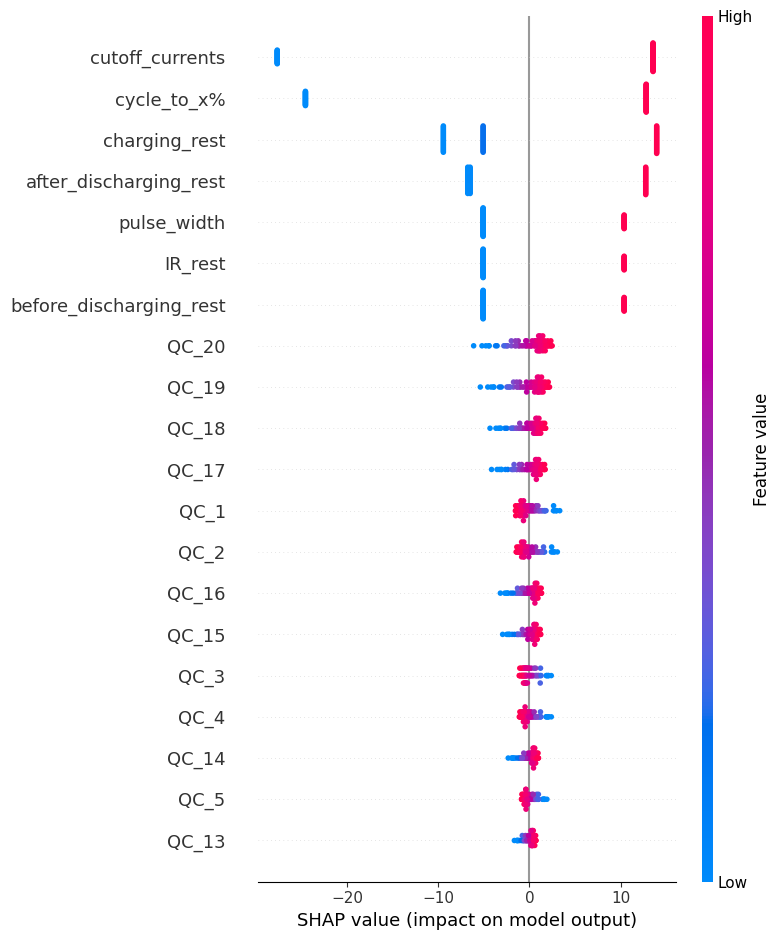

In [40]:
# Explicabilité avec SHAP sur les données X_binary_explicabilite et y_explicabilite

import shap

# Charger le meilleur modèle
# filename = 
model = pickle.load(open(filename, "rb"))

# Initialiser SHAP
explainer = shap.Explainer(model, X_binary_explicabilite)

# Calculer les valeurs SHAP
shap_values = explainer.shap_values(X_binary_explicabilite)

# Afficher les valeurs SHAP
shap.summary_plot(shap_values, X_binary_explicabilite, feature_names=features_binary, show=False)
plt.savefig(f"Images/shap_RegressionRidge_{taille_fenetre_to_run}w_{taille_stride_to_run}s.png")
plt.show()